In [37]:
using JLD2
using StatsPlots
using Plots.PlotMeasures

In [6]:
loaded_f = jldopen("/Users/joshua/Desktop/QuantumInspiredMLFinal/QuantumInspiredML/FinalBenchmarks/ECG200/data_driven_encoding/ECG_ImputationFinalResults_30Fold_data_driven.jld2");
mps_results = read(loaded_f, "mps_results")
nn_results = read(loaded_f, "nn_results");

In [53]:
per_pm_30_fold_mean_mps = [mean([mean(vcat([mps_results[pm][fold][i] for i in 1:100]...)) for fold in 1:30]) for pm in 1:10]
per_pm_30_fold_std_mps = [std([mean(vcat([mps_results[pm][fold][i] for i in 1:100]...)) for fold in 1:30]) for pm in 1:10]
per_pm_30_fold_mean_nn = [mean([mean(vcat([nn_results[pm][fold][i] for i in 1:100]...)) for fold in 1:30]) for pm in 1:10]
per_pm_30_fold_std_nn = [std([mean(vcat([nn_results[pm][fold][i] for i in 1:100]...)) for fold in 1:30]) for pm in 1:10]
# standard errors 
per_pm_30_fold_standard_error_mps = per_pm_30_fold_std_mps/sqrt(30)
per_pm_30_fold_standard_error_nn = per_pm_30_fold_std_nn/sqrt(30)

10-element Vector{Float64}:
 0.0015587466048526484
 0.001470931042975212
 0.0014385217524002397
 0.0016427390385557806
 0.0015858176097231368
 0.0017282510773916644
 0.0018981673090736329
 0.0019318330488151806
 0.0022505932498381133
 0.0025646312602886634

In [56]:
pal = palette(:tab10);
group_colours = [pal[4] pal[2]]

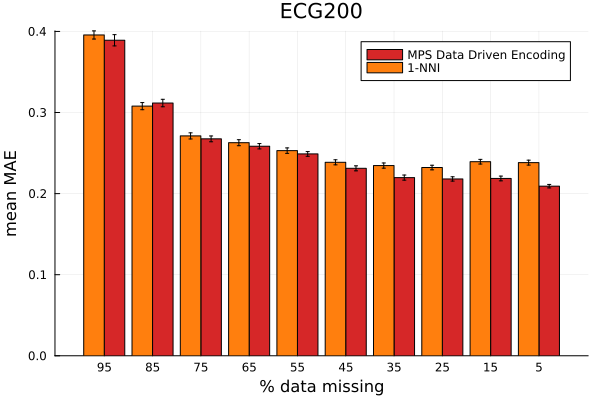

In [65]:
groupedbar([per_pm_30_fold_mean_mps per_pm_30_fold_mean_nn],
    yerr=[1.96 * per_pm_30_fold_standard_error_mps 1.96 * per_pm_30_fold_standard_error_nn],
    c=group_colours,
    labels=["MPS Data Driven Encoding" "1-NNI"],
    legend=:topright,
    markersize=2,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    xlabel="% data missing",
    ylabel="mean MAE",
    title="ECG200")
xflip!(true)